In [ ]:
#TODO do peak width calculations on LS

In [82]:
import sys
!conda install --yes --prefix {sys.prefix} astropy   

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\conda

  added / updated specs:
    - astropy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/main::conda-4.8.3-py37_0




conda-4.8.3          | 2.8 MB    |            |   0% 
conda-4.8.3          | 2.8 MB    | 6          |   7% 
conda-4.8.3          | 2.8 MB    | ##8        |  28% 
conda-4.8.3          | 2.8 MB    | #####3     |  53% 
conda-4.8.3          | 2.8 MB    | #######3   |  74% 
conda-4.8.3          | 2.8 MB    | ########## | 100% 
Preparing transaction: ...wor

In [83]:
#from astropy.io import fits
import os
#from PyAstronomy.pyasl import foldAt
#import shutil
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize
from scipy.interpolate import CubicSpline
from astropy.timeseries import LombScargle
from scipy.integrate import simps
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter
import scipy.signal as signal

from lmfit import Model

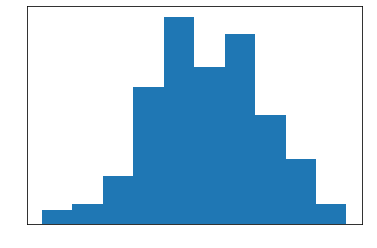

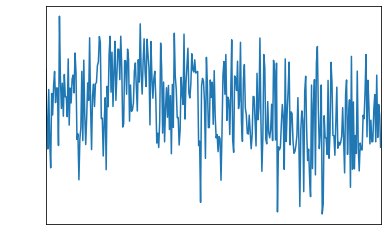

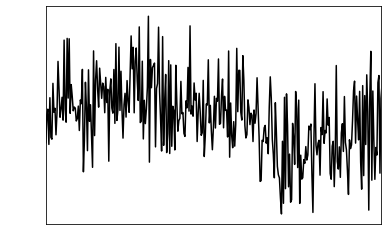

In [37]:
# 345 points one cycle 20 sec SNR=300
#~90000 counts
gaussPlot = np.random.normal(0, np.sqrt(90000), 345)

xpoints = np.linspace(0,115,345)
xpoints2 = np.linspace(0,120,345)
ypoints = 90000 + 180*np.sin((((2*np.pi)/115))*xpoints) + gaussPlot
ypoints2 = 50625 + 180*np.sin(((2*np.pi)/115)*xpoints) + np.random.normal(0, np.sqrt(50625), 345)
plt.hist(gaussPlot)
plt.show()
plt.plot(xpoints,ypoints)
plt.xlim(0,115)
plt.show()
plt.plot(xpoints2, ypoints2, 'k')
plt.xlim(0,115)
noise = np.random.normal(0,1/3,120)

In [59]:
def test_func(x, c):
    return 90000 + 180*np.sin(c * x)

params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])

print(params)
print(((2*np.pi)/115))
print(2*np.pi/params[0])

[0.05459891]
0.054636393975474665
115.07895599904603


(array([  8.,  80., 245., 275., 252., 100.,  32.,   4.,   1.,   3.]),
 array([103.65236931, 106.81039428, 109.96841925, 113.12644423,
        116.2844692 , 119.44249418, 122.60051915, 125.75854412,
        128.9165691 , 132.07459407, 135.23261904]),
 <a list of 10 Patch objects>)

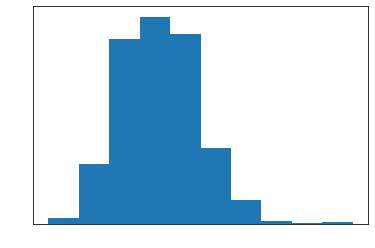

In [60]:
npoints = 345
xpoints = np.linspace(0,115, npoints)
estimates = []
for i in range(1000):
    ypoints = 90000 + 180*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, np.sqrt(90000), npoints)
    params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
    estimate = 2*np.pi/params[0]
    estimates = np.append(estimates,estimate)
plt.hist(estimates)

(array([ 12.,  64., 207., 257., 260., 134.,  50.,  11.,   3.,   2.]),
 array([104.43547987, 107.19435392, 109.95322797, 112.71210202,
        115.47097607, 118.22985012, 120.98872417, 123.74759822,
        126.50647227, 129.26534632, 132.02422037]),
 <a list of 10 Patch objects>)

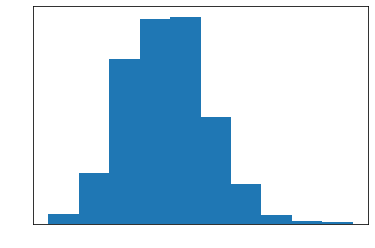

In [61]:
npoints = 690
SNR = 225
xpoints = np.linspace(0,115, npoints)
estimates2 = []
def test_func(x, c):
    return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
for i in range(1000):
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, npoints)
    params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
    estimate = 2*np.pi/params[0]
    estimates2 = np.append(estimates2,estimate)
plt.hist(estimates2)

4.08416531902038 3.819874919343602


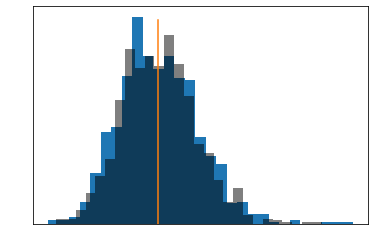

In [62]:
plt.hist(estimates, bins='auto')
print(np.std(estimates), np.std(estimates2))
plt.hist(estimates2, color='k', bins='auto', alpha=0.5)
plt.plot([115,115],[0,120])

In [ ]:
#do same hist on LS
do colour plot of sigma (color) vs exposureTime for single curve vs binned curves
relate to MUF?

In [14]:
#2,2
snrA = [165,180,195,208,221,233,255,285,313,330]
points =[]
exposure = [5,6,7,8,9,10,12,15,18,20]
for el in exposure:
    point = np.rint(115*60/el)
    points = np.append(points,point)
print(points)

[1380. 1150.  986.  862.  767.  690.  575.  460.  383.  345.]


D:\conda\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\conda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


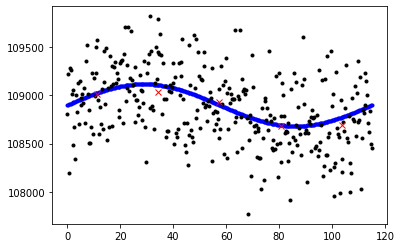

In [12]:
xpoints = np.linspace(0, 115, int(points[9]))
SNR=330
def test_func(x, c):
    return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
estimate = 2*np.pi/params[0]
plt.plot(xpoints, test_func(xpoints, ((2*np.pi)/115)), 'b.')
plt.plot(xpoints, ypoints, 'k.')
means = []
meansx = []
for i in range(10):
    start = i*69
    finish = start+69
    means = np.append(means, np.mean(ypoints[start:finish]))
    meansx = np.append(meansx, np.mean(xpoints[start:finish]))
plt.plot(meansx, means, 'rx')


(0, 115)

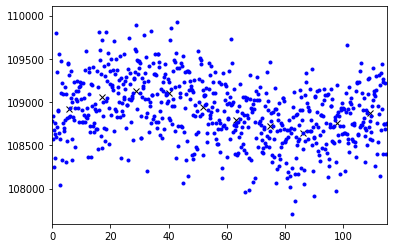

In [20]:
xpoints = np.linspace(0, 115, 690)
xpoints = np.append(xpoints, np.linspace(4320,4435,690))
ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
meanedy = np.mean(ypoints.reshape(-1, 69), axis=1)
meanedx = np.mean(xpoints.reshape(-1, 69), axis=1)
plt.plot(meanedx, meanedy, 'kx')
plt.plot(xpoints,ypoints, 'b.')
plt.xlim(0,115)

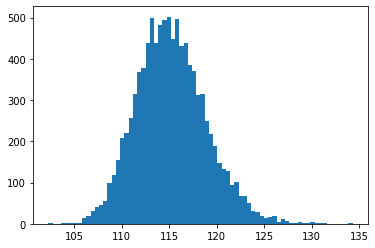

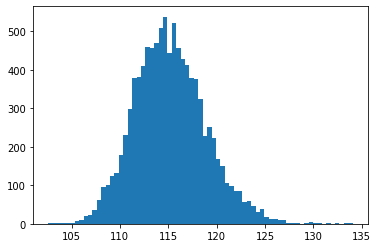

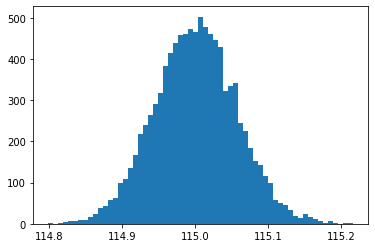

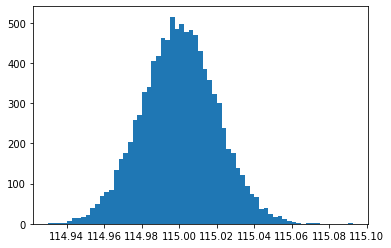

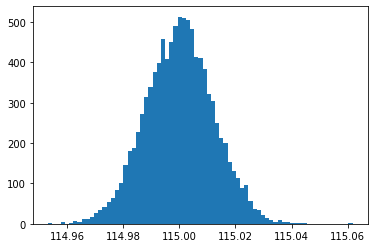

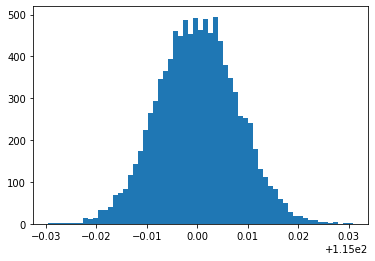

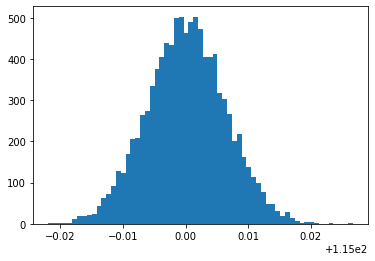

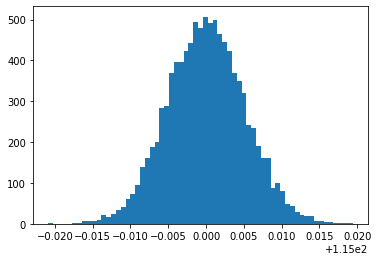

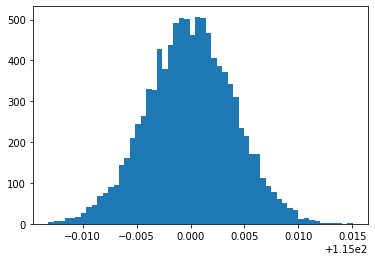

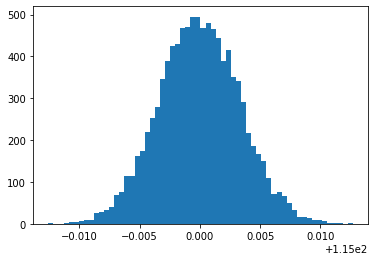

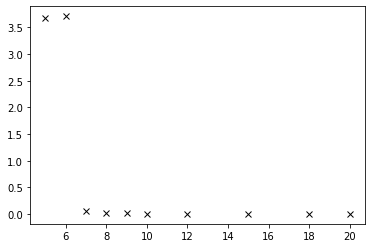

In [7]:
#this is 2 consecutive
STDs = []
xpoints = np.linspace(0, 115, 690)
SNR=233

def test_func(x, c):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
for i in range(10):
    estimates2=[]
    xpoints = np.linspace(0, 115, 690)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4435,690))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11635,690))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15955,690))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23155,690))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24595,690))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27475,690))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36115,690))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40115,690))
    
    for j in range(10000):
        ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
        params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
        estimate = 2*np.pi/params[0]
        estimates2 = np.append(estimates2,estimate)
    thisSTD = np.std(estimates2)
    plt.hist(estimates2, bins='auto')
    plt.show()
    STDs = np.append(STDs, thisSTD)
plt.plot(exposure, STDs, 'kx')

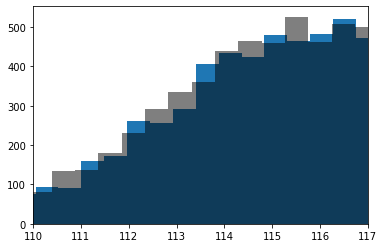

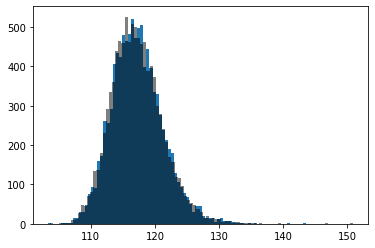

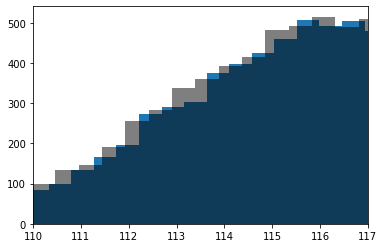

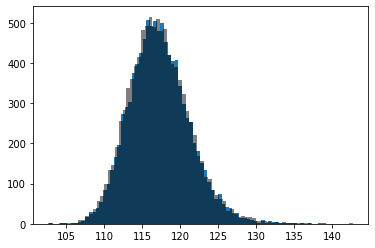

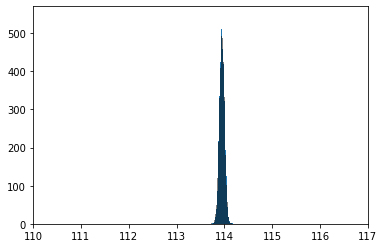

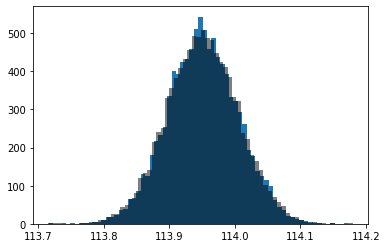

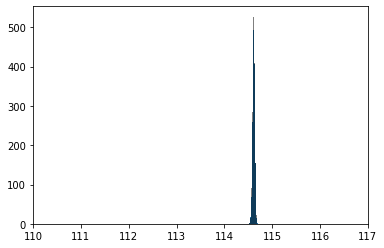

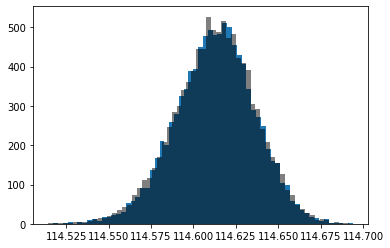

KeyboardInterrupt: 

In [26]:
#this is not! consecutive

xpoints = np.linspace(0, 115, 1380)
SNR=165

def test_func(x, c):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
for i in range(10):
    estimates2=[]
    estimatesMeaned = []
    xpoints = np.linspace(0, 115, 1380)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4435,1380))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11635,1380))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15955,1380))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23155,1380))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24595,1380))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27475,1380))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36115,1380))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40115,1380))
    
    for j in range(10000):
        ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/117))*xpoints) + np.random.normal(0, SNR, len(xpoints))
        params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints, p0=[((2*np.pi)/115)],maxfev=5000)
        estimate = 2*np.pi/params[0]
        estimates2 = np.append(estimates2,estimate)
        meanedy = np.mean(ypoints.reshape(-1, 138), axis=1)
        meanedx = np.mean(xpoints.reshape(-1, 138), axis=1)
        params, params_covariance = optimize.curve_fit(test_func, meanedx, meanedy, p0=[((2*np.pi)/115)],maxfev=5000)
        estimate = 2*np.pi/params[0]
        estimatesMeaned = np.append(estimatesMeaned,estimate)
    
    meanedSTD = np.std(estimatesMeaned)
    thisSTD = np.std(estimates2)
    plt.hist(estimates2, bins='auto')
    plt.hist(estimatesMeaned, bins='auto', alpha=0.5, color='k')
    plt.xlim(110,117)
    plt.show()
    
    plt.hist(estimates2, bins='auto')
    plt.hist(estimatesMeaned, bins='auto', alpha=0.5, color='k')
    plt.show()

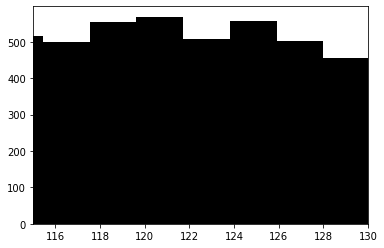

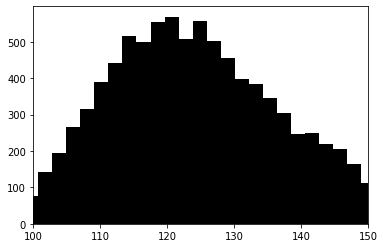

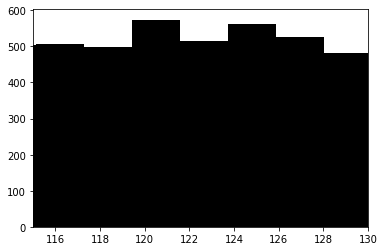

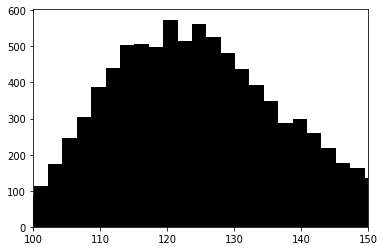

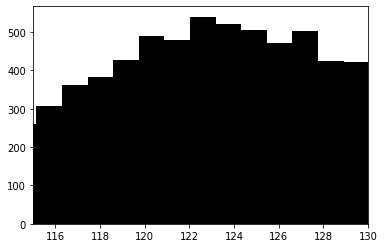

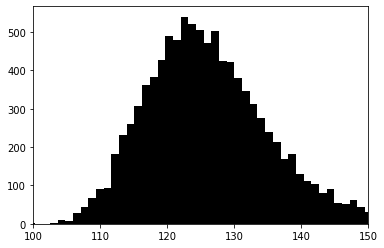

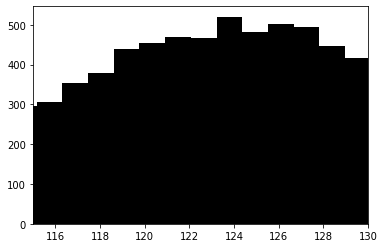

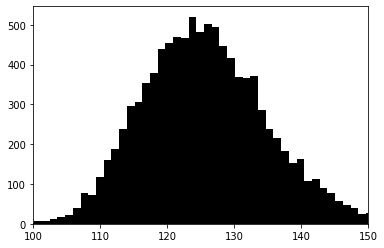

D:\conda\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


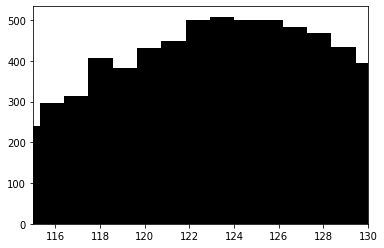

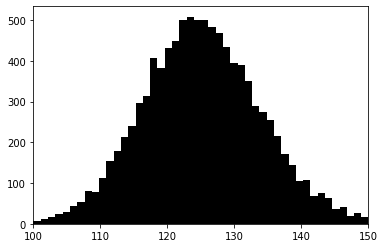

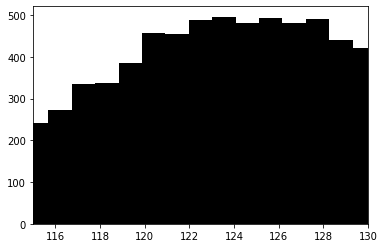

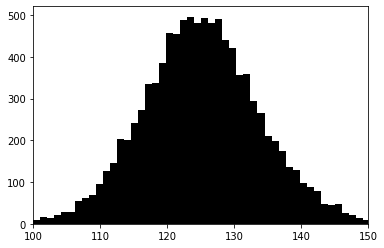

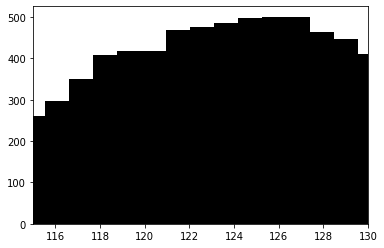

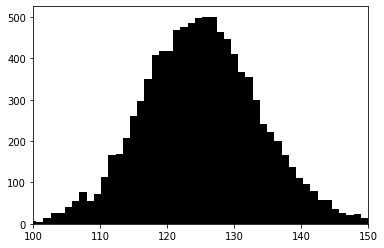

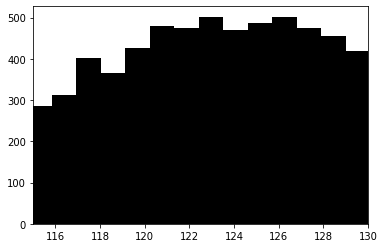

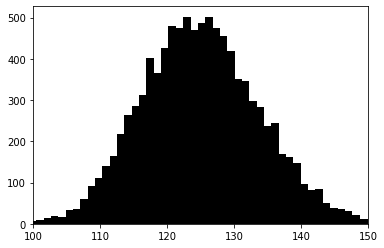

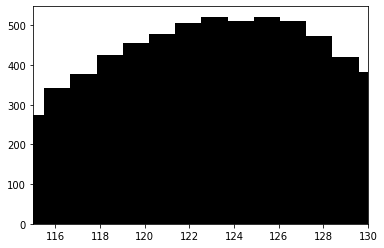

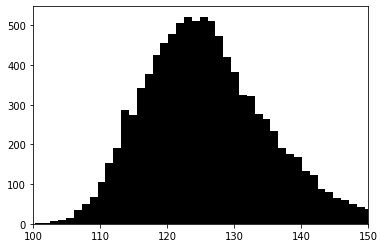

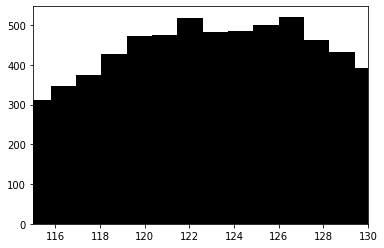

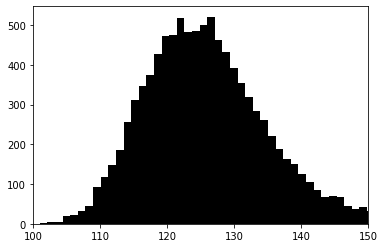

In [30]:
#this is not! consecutive

xpoints = np.linspace(0, 115, 690)
SNR=233

def test_func(x, c, phase):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x + phase)
for i in range(10):
    estimates2=[]
    estimatesMeaned = []
    xpoints = np.linspace(0, 115, 1380)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4435,690))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11635,690))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15955,690))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23155,690))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24595,690))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27475,690))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36115,690))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40115,690))
    
    for j in range(10000):
        ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/125))*xpoints) + np.random.normal(0, SNR, len(xpoints))
        meanedy = ypoints.reshape(-1, 690)
        meanedx = xpoints.reshape(-1, 690)
        thisestimate = []
        for k in range (np.shape(meanedx)[0]):
            #phase
            xpoints = meanedx[k][:]
            ypoints = meanedy[k][:]
            params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints, p0=[((2*np.pi)/115), 0],maxfev=5000)
            estimate = 2*np.pi/params[0]
            thisestimate = np.append(thisestimate, estimate)
        estimate = np.mean(thisestimate)
        estimatesMeaned = np.append(estimatesMeaned,estimate)
    

    plt.hist(estimatesMeaned, bins='auto', color='k')
    plt.xlim(115,130)
    plt.show()
    plt.hist(estimatesMeaned, bins='auto', color='k')
    plt.xlim(100,150)
    plt.show()

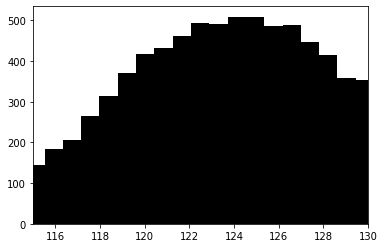

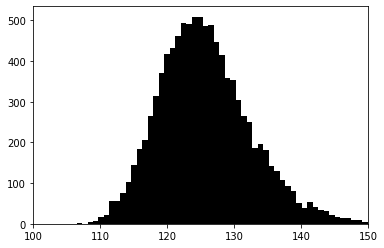

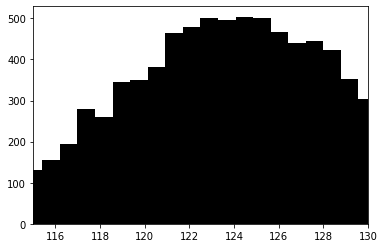

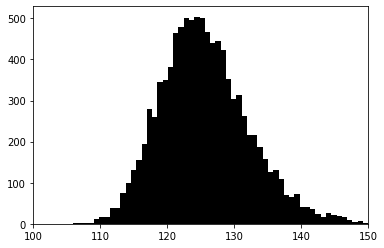

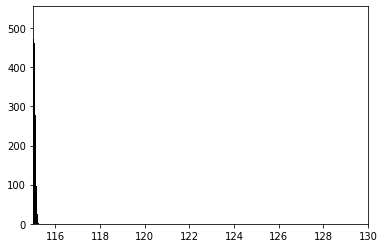

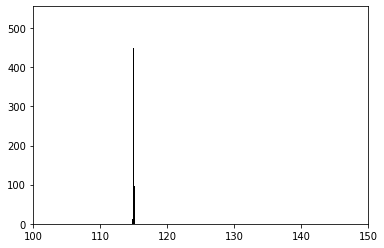

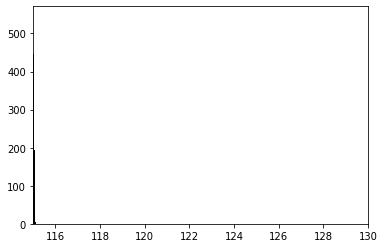

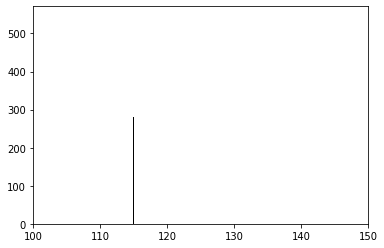

KeyboardInterrupt: 

In [31]:
#this is not! consecutive

xpoints = np.linspace(0, 115, 690)
SNR=233

def test_func(x, c, phase):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x + phase)
for i in range(10):
    estimates2=[]
    estimatesMeaned = []
    xpoints = np.linspace(0, 115, 1380)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4435,690))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11635,690))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15955,690))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23155,690))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24595,690))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27475,690))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36115,690))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40115,690))
    
    for j in range(10000):
        ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/125))*xpoints) + np.random.normal(0, SNR, len(xpoints))

        params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints, p0=[((2*np.pi)/115), 0],maxfev=5000)
        estimate = 2*np.pi/params[0]
        estimatesMeaned = np.append(estimatesMeaned,estimate)
    

    plt.hist(estimatesMeaned, bins='auto', color='k')
    plt.xlim(115,130)
    plt.show()
    plt.hist(estimatesMeaned, bins='auto', color='k')
    plt.xlim(100,150)
    plt.show()

100.10007737858732


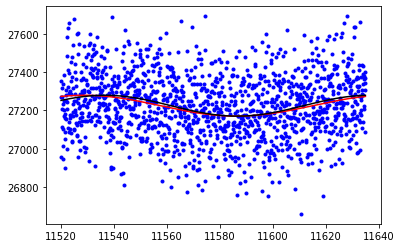

In [23]:
plt.plot(xpoints,ypoints, 'b.')
plt.plot(xpoints, test_func(xpoints, ((2*np.pi)/115)), 'r')
params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints, p0=[((2*np.pi)/100)],maxfev=5000)
estimate = 2*np.pi/params[0]
print(estimate)
plt.plot(xpoints, test_func(xpoints, params[0]), 'k')

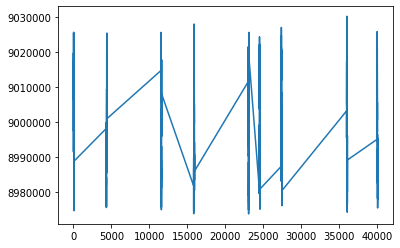

In [53]:
xpoints = np.linspace(0, 115, 1380)
SNR=3000
xpoints = np.append(xpoints, np.linspace(4320,4435,1380))

xpoints = np.append(xpoints, np.linspace(11520,11635,1380))

xpoints = np.append(xpoints, np.linspace(15840,15955,1380))
xpoints = np.append(xpoints, np.linspace(23040,23155,1380))

xpoints = np.append(xpoints, np.linspace(24480,24595,1380))    
xpoints = np.append(xpoints, np.linspace(27360,27475,1380))
xpoints = np.append(xpoints, np.linspace(36000,36115,1380))
xpoints = np.append(xpoints, np.linspace(40000,40115,1380))
    
ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/125))*xpoints) + np.random.normal(0, SNR, len(xpoints))
plt.plot(xpoints,ypoints)
np.savetxt('myfileLarge.dat', np.c_[xpoints,ypoints])
#now do 3

In [81]:
#this is not! consecutive
#The one!!
#1380
xpoints = np.linspace(0, 115, 1380)
SNR=180

def test_func(x, c, phase):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x + phase)
for i in range(10):
    i = i+1
    estimates2=[]
    estimatesMeaned = []
    xpoints = np.linspace(0, 125, 1380)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4445,1380))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11645,1380))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15965,1380))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23165,1380))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24605,1380))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27485,1380))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36125,1380))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40125,1380))
    if i > 9:
        xpoints = np.append(xpoints, np.linspace(41000,41125,1380))
        print('in')
    
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
    filename = 'Finaltest'+str(i)+'.dat'
    np.savetxt(filename, np.c_[xpoints,ypoints])

in


In [78]:
Fs = 1000
SNR=1800
# if to determined append c
fModc = 12 #in hours
modEffectc = 3#3
ampc = 2
phasec = 10
rotTime = 125/60 # hours

print('done')



#this is not! consecutive
#1380
xpoints = np.linspace(0, 125, 1380)

for i in range(10):
    i = i+1
    estimates2=[]
    estimatesMeaned = []
    xpoints = np.linspace(0, 125, 1380)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4445,1380))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11645,1380))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15965,1380))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23165,1380))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24605,1380))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27485,1380))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36125,1380))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40125,1380))
    if i > 9:
        xpoints = np.append(xpoints, np.linspace(41000,41125,1380))
        print('in')
    xpointsMin = xpoints
    xpoints = xpoints/60
    ypoints  = (SNR*SNR) + (SNR*SNR*0.002)*np.sin(2*rotTime/np.pi*(modEffectc*xpoints-(fModc/2/np.pi)*np.cos(2*np.pi*xpoints/fModc))-phasec)
    
    

    filename = 'CAMOD'+str(i)+'.dat'
    np.savetxt(filename, np.c_[xpointsMin,ypoints])


done
in


(0, 125)

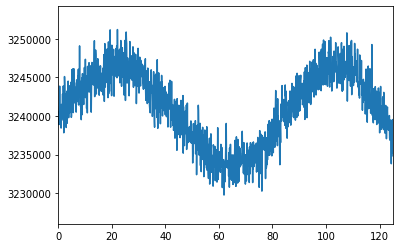

In [77]:
ypoints  = (SNR*SNR) + (SNR*SNR*0.002)*np.sin(2*rotTime/np.pi*(modEffectc*xpoints-(fModc/2/np.pi)*np.cos(2*np.pi*xpoints/fModc))-phasec)+np.random.normal(0, SNR, len(xpoints))
plt.plot(xpointsMin, ypoints)
plt.xlim(0,125)

In [66]:
#this is not! consecutive
#345
xpoints = np.linspace(0, 125, 345)
SNR=330

def test_func(x, c, phase):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x + phase)
for i in range(10):
    i = i+1
    estimates2=[]
    estimatesMeaned = []
    xpoints = np.linspace(0, 125, 345)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4445,345))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11645,345))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15965,345))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23165,345))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24605,345))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27485,345))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36125,345))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40125,345))
    if i > 9:
        xpoints = np.append(xpoints, np.linspace(41000,41125,345))
        print('in')
    
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/125))*xpoints) + np.random.normal(0, SNR, len(xpoints))
    filename = 'GoodSNRtest'+str(i)+'.dat'
    np.savetxt(filename, np.c_[xpoints,ypoints])

in


In [68]:
snrA = [180,197,213,228,242,255,279,312,342,361]
points =[]
exposure = [5,6,7,8,9,10,12,15,18,20]
for el in exposure:
    point = np.rint(115*60/el)
    points = np.append(points,point)
points

array([1380., 1150.,  986.,  862.,  767.,  690.,  575.,  460.,  383.,
        345.])

In [ ]:
#this is not! consecutive
#345
xpoints = np.linspace(0, 125, 345)
SNR=330

def test_func(x, c, phase):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x + phase)
for i in range(10):
    i = i+1
    estimates2=[]
    estimatesMeaned = []
    xpoints = np.linspace(0, 125, 345)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4445,345))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11645,345))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15965,345))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23165,345))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24605,345))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27485,345))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36125,345))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40125,345))
    if i > 9:
        xpoints = np.append(xpoints, np.linspace(41000,41125,345))
        print('in')
    
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/125))*xpoints) + np.random.normal(0, SNR, len(xpoints))
    filename = 'GoodSNRtest'+str(i)+'.dat'
    np.savetxt(filename, np.c_[xpoints,ypoints])

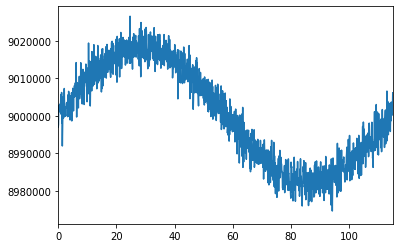

In [52]:
xpoints = np.linspace(0, 115, 1380)
SNR=3000
xpoints = np.append(xpoints, np.linspace(4320,4435,1380))

xpoints = np.append(xpoints, np.linspace(11520,11635,1380))

xpoints = np.append(xpoints, np.linspace(15840,15955,1380))
xpoints = np.append(xpoints, np.linspace(23040,23155,1380))

xpoints = np.append(xpoints, np.linspace(24480,24595,1380))    
#xpoints = np.append(xpoints, np.linspace(27360,27475,690))
#xpoints = np.append(xpoints, np.linspace(36000,36115,690))
#xpoints = np.append(xpoints, np.linspace(40000,40115,690))
    
ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
plt.plot(xpoints,ypoints)
plt.xlim(0,115)
np.savetxt('6fileLotsSNR.dat', np.c_[xpoints,ypoints])
#now do 3

In [54]:
STDs = []
xpointsToPick = np.linspace(0, 259200, 100000)
i = 10
xpoints = np.random.choice(xpointsToPick, 1380*(i+1), replace=False)
SNR = 165
ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, (1380*(i+1)))
np.savetxt('10Ran.dat', np.c_[xpoints,ypoints])

In [55]:
STDs = []
SNR = 165
xpointsChoose = np.linspace(60, 259200, 100000)
i = 20
xpoints = np.linspace(0, 60, 690)
starter = np.random.choice(xpointsChoose, i+1, replace=False)
for el in starter:
    xpoints = np.append(xpoints, np.linspace(el, (el+60), 690))

ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
np.savetxt('10ConsHalfSlice.dat', np.c_[xpoints,ypoints])

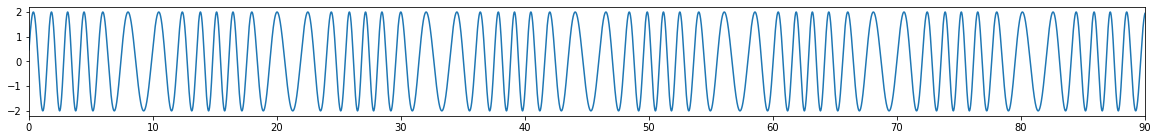

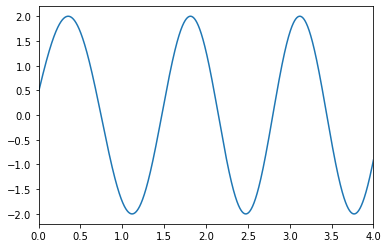

134.9984787793409
90000


In [60]:
Fs = 1000
# if to determined append c
fModc = 12 #in hours
modEffectc = 3#3
ampc = 2
phasec = 10
rotTime = 115/60 # hours
t = np.arange(0,30*3,1/Fs)
f = modEffectc+np.sin(t*2*np.pi/fModc) #hours
y_exact  = ampc*np.sin(2*rotTime/np.pi*(modEffectc*t-(fModc/2/np.pi)*np.cos(2*np.pi*t/fModc))-phasec)
plt.figure(figsize=(20,2))
plt.xlim(0,90)
plt.plot(t,y_exact)
plt.show()
plt.xlim(0,4)
plt.plot(t,y_exact)
plt.show()
#plt.hist(2*rotTime*(modEffectc*t-(fModc/2/np.pi)*np.cos(2*np.pi*t/fModc)), bins='auto')
print(np.mean((modEffectc*t-(fModc/2/np.pi)*np.cos(2*np.pi*t/fModc))))
print(len(y_exact))

In [61]:
xpoints = t*60
ypoints = y_exact
np.savetxt('100Mod.dat', np.c_[xpoints,ypoints])

12420


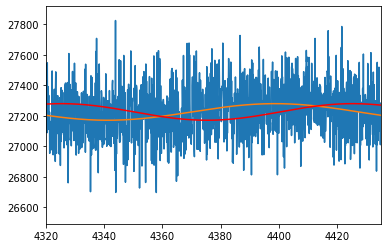

In [3]:
SNR=165

def test_func(x, c):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
xpoints = np.linspace(0, 115, 1380)
xpoints = np.append(xpoints, np.linspace(4320,4435,1380))
xpoints = np.append(xpoints, np.linspace(11520,11635,1380))
xpoints = np.append(xpoints, np.linspace(15840,15955,1380))
xpoints = np.append(xpoints, np.linspace(23040,23155,1380))
xpoints = np.append(xpoints, np.linspace(24480,24595,1380))    
xpoints = np.append(xpoints, np.linspace(27360,27475,1380))
xpoints = np.append(xpoints, np.linspace(36000,36115,1380))
xpoints = np.append(xpoints, np.linspace(40000,40115,1380))
ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
plt.plot(xpoints, ypoints)
plt.plot(xpoints, test_func(xpoints, ((2*np.pi)/115)))
params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,p0=[((2*np.pi)/100)],maxfev=5000)
plt.plot(xpoints, test_func(xpoints, params[0]), c='r')
plt.xlim(4320,4435)
print(len(xpoints))

[[Model]]
    Model(test_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 12420
    # variables        = 1
    chi-square         = 3.6308e+08
    reduced chi-square = 29236.2030
    Akaike info crit   = 127717.885
    Bayesian info crit = 127725.312
[[Variables]]
    c:  0.06282633 +/- 1.6128e-06 (0.00%) (init = 0.06283185)


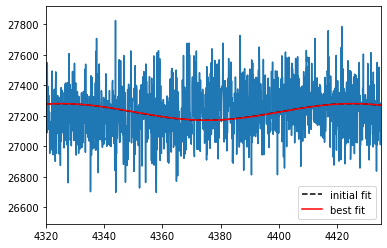

In [10]:
sinmodel = Model(test_func)
result = sinmodel.fit(ypoints, x=xpoints, c=((2*np.pi)/100))

print(result.fit_report())

plt.plot(xpoints, ypoints)
plt.plot(xpoints, result.init_fit, 'k--', label='initial fit')
plt.plot(xpoints, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.xlim(4320,4435)
plt.show()

114.99883554666974


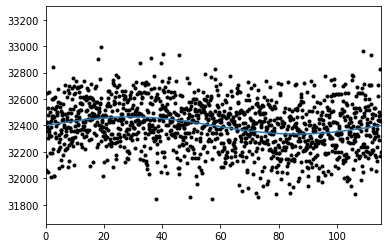

In [12]:
plt.plot(xpoints,ypoints, 'k.')
plt.xlim(0,115)
plt.plot(xpoints, test_func(xpoints,params[0]))
print(2*np.pi/params[0])

In [22]:
xpoints = np.linspace(0, 115, 1380)
SNR = 180
xpoints = np.append(xpoints, np.linspace(14320,14435,1380))
xpoints = np.append(xpoints, np.linspace(21520,21635,1380))
ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
estimate = 2*np.pi/params[0]
print(estimate)
#TODO gen modification and test how many curves
#TODO check if slices better

114.99734883040774


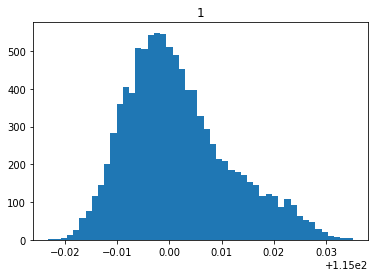

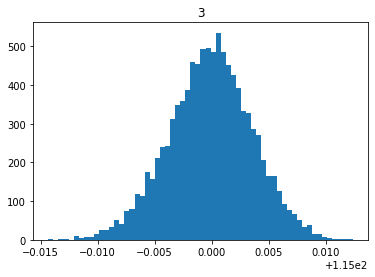

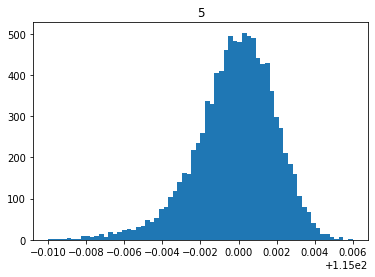

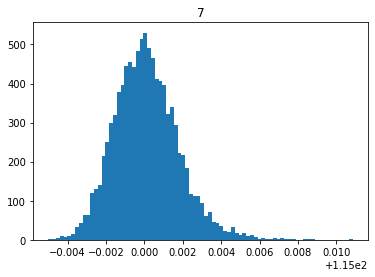

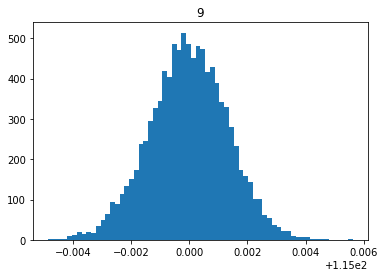

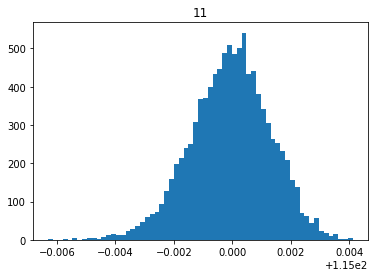

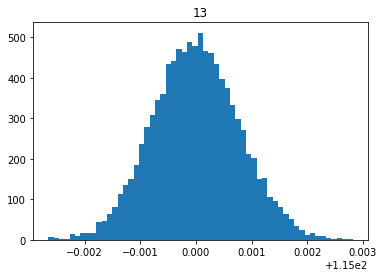

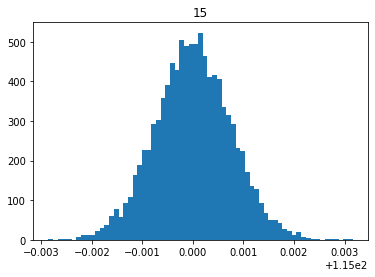

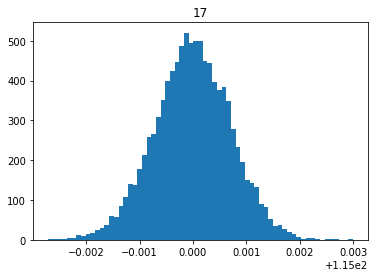

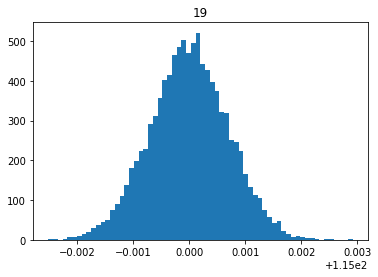

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

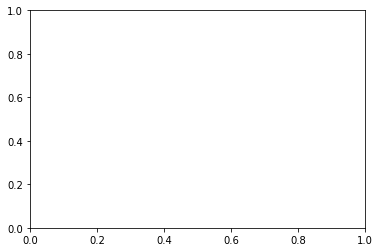

In [34]:
xpointsChoose = np.linspace(23, 259200, 100000)
STDs = []
SNR=180
def test_func(x, c):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
for i in range(20):
    estimates2=[]
    xpoints = []
    starter = np.random.choice(xpointsChoose, i+1, replace=False)
    for el in starter:
        xpoints = np.append(xpoints, np.linspace(el, (el+23), 276))
    for j in range(10000):
        ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
        
        params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
        estimate = 2*np.pi/params[0]
        estimates2 = np.append(estimates2,estimate)
    thisSTD = np.std(estimates2)
    if i%2 == 0:
        plt.title(str(i+1))
        plt.hist(estimates2, bins='auto')
        plt.show()
    STDs = np.append(STDs, thisSTD)
plt.plot(exposure, STDs, 'kx')        
        


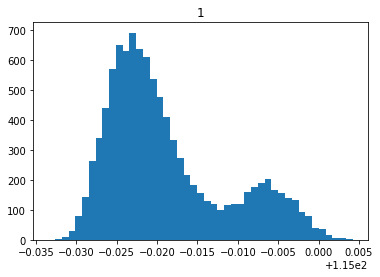

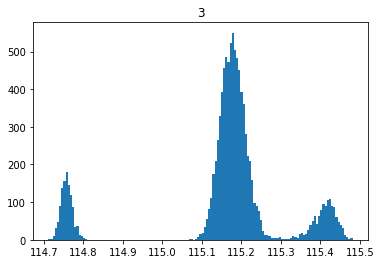

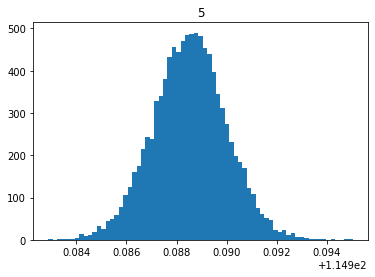

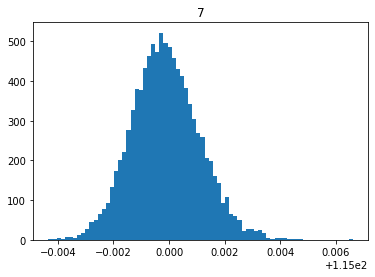

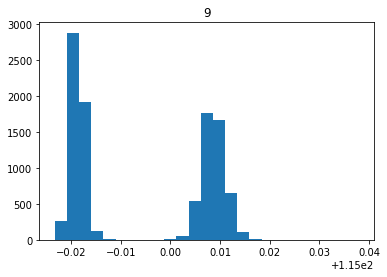

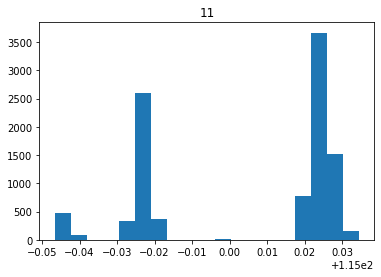

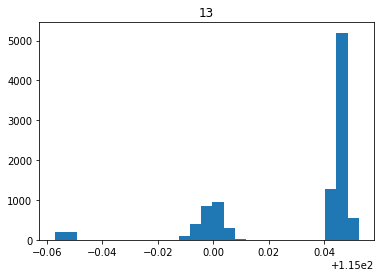

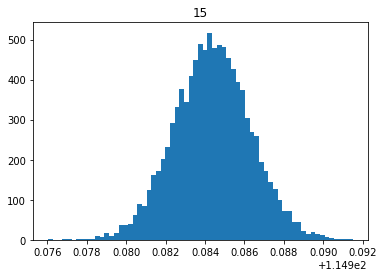

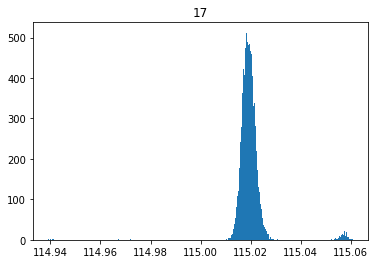

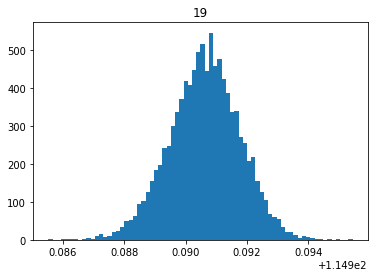

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

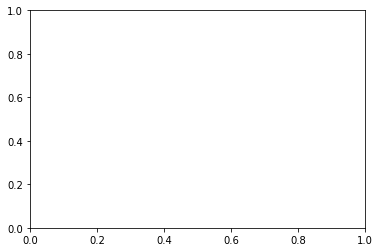

In [37]:
xpointsChoose = np.linspace(23, 259200, 100000)
STDs = []
SNR=180
def test_func(x, c):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
for i in range(20):
    estimates2=[]
    xpoints = []
    starter = np.random.choice(xpointsChoose, i+1, replace=False)
    for el in starter:
        xpoints = np.append(xpoints, np.linspace(el, (el+23), 276))
    for j in range(10000):
        ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/117))*xpoints) + np.random.normal(0, SNR, len(xpoints))
        
        params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)], maxfev=5000)
        estimate = 2*np.pi/params[0]
        estimates2 = np.append(estimates2,estimate)
    thisSTD = np.std(estimates2)
    if i%2 == 0:
        plt.title(str(i+1))
        plt.hist(estimates2, bins='auto')
        plt.show()
    STDs = np.append(STDs, thisSTD)
       
        


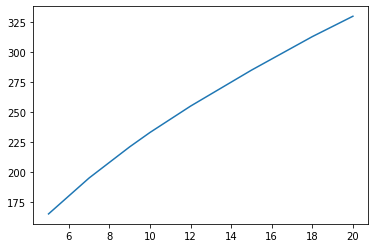

In [19]:
plt.plot(exposure,snrA)

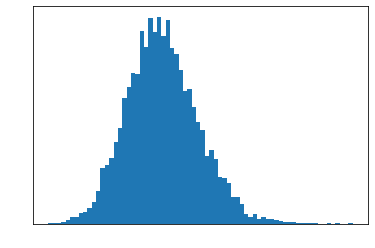

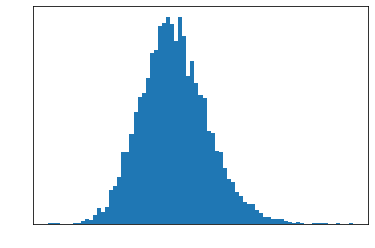

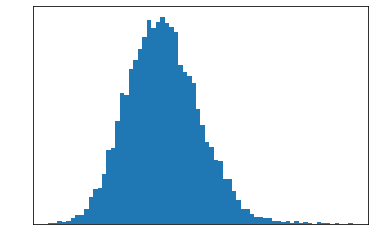

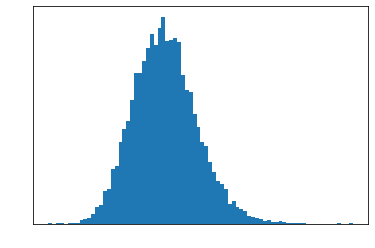

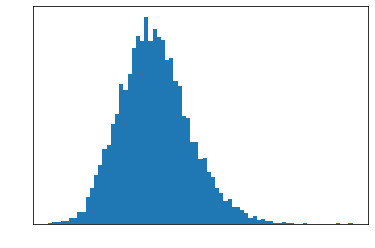

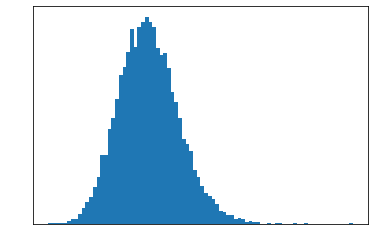

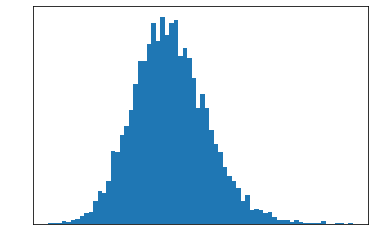

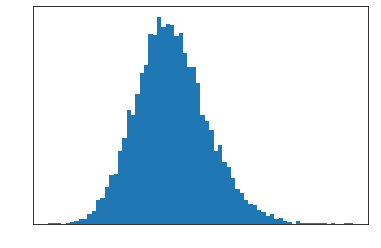

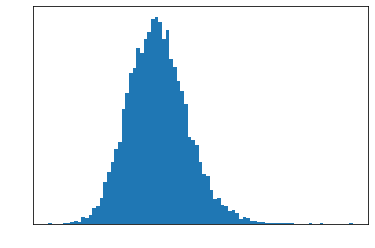

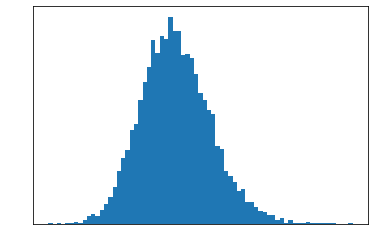

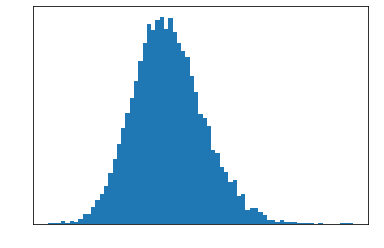

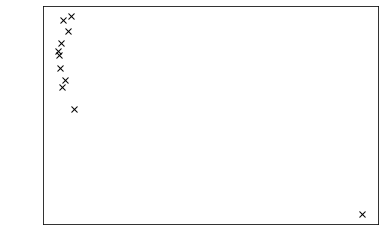

In [67]:
STDs = []
for i in range(len(snrA)):
    npoints = int(points[i])
    SNR = snrA[i]
    xpoints = np.linspace(0,115, npoints)
    estimates2 = []
    def test_func(x, c):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
    for j in range(10000):
        ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, npoints)
        params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
        estimate = 2*np.pi/params[0]
        estimates2 = np.append(estimates2,estimate)
    thisSTD = np.std(estimates2)
    plt.hist(estimates2, bins='auto')
    plt.show()
    STDs = np.append(STDs, thisSTD)
plt.plot(exposure, STDs, 'kx')

(4, 22)

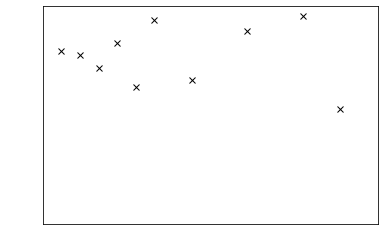

In [69]:
plt.plot(exposure,STDs, 'kx')
plt.xlim(4,22)

73
120.48192771084332


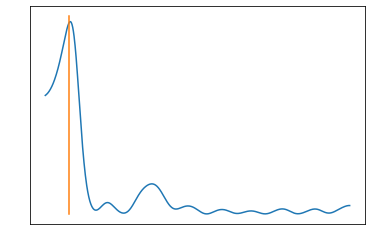

In [86]:
freq = np.arange(0.001, 0.09, 0.0001)
power = LombScargle(xpoints,ypoints).power(freq)
print(np.argmax(power))
print(1/freq[73])
plt.plot(freq,power)
plt.plot([0.008,0.008],[0,0.8])

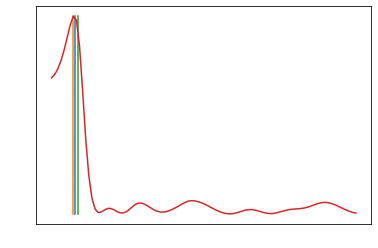

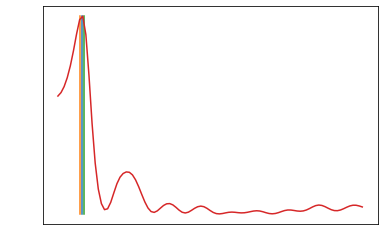

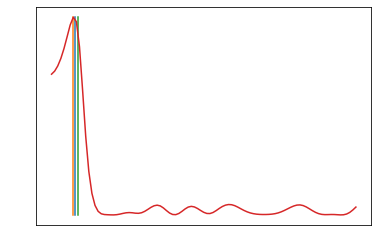

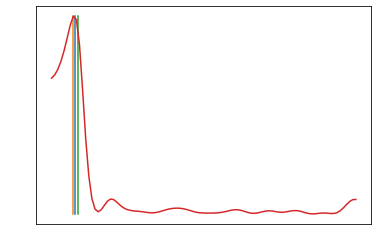

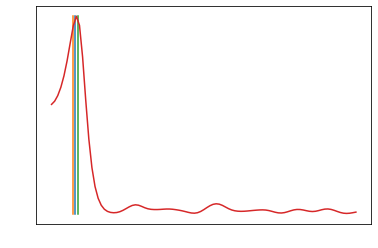

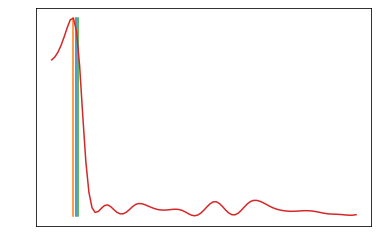

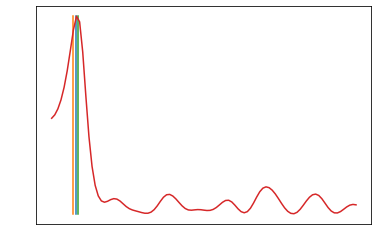

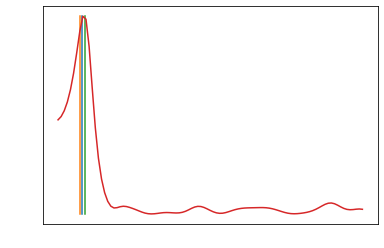

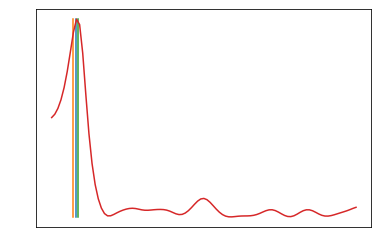

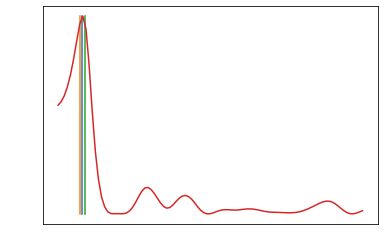

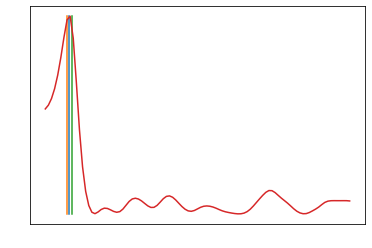

In [94]:
STDs = []
freq = np.arange(0.001, 0.1, 0.001)
for i in range(len(snrA)):
    npoints = int(points[i])
    SNR = snrA[i]
    xpoints = np.linspace(0,115, npoints)
    estimates2 = []
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, npoints)
    power = LombScargle(xpoints,ypoints).power(freq)
    plt.plot([1/115,1/115],[0,max(power)])
    plt.plot([1/125,1/125],[0,max(power)])
    plt.plot([1/105,1/105],[0,max(power)])
    plt.plot(freq, power)
    
    plt.show()

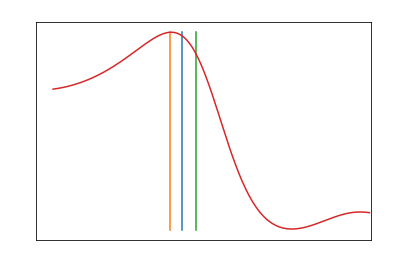

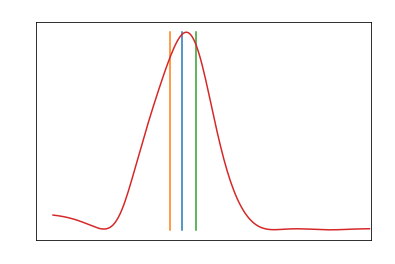

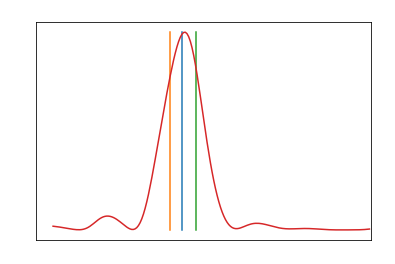

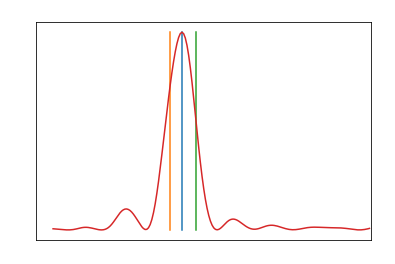

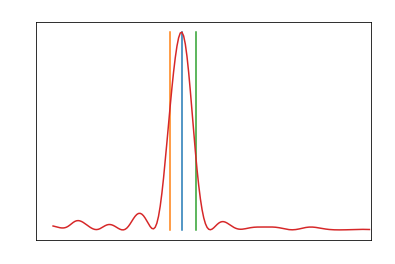

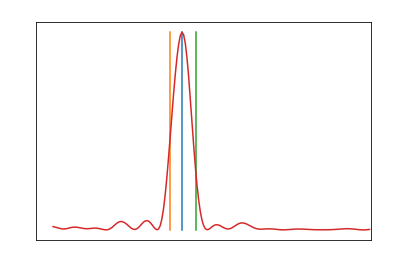

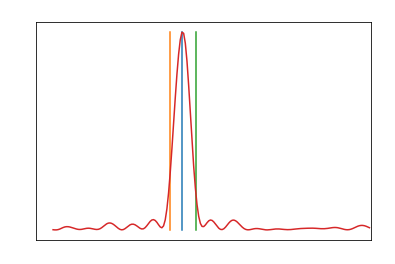

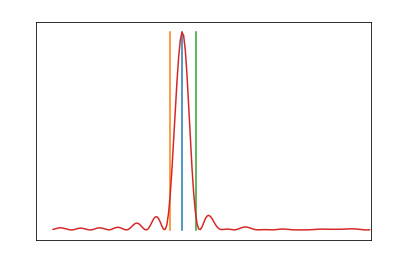

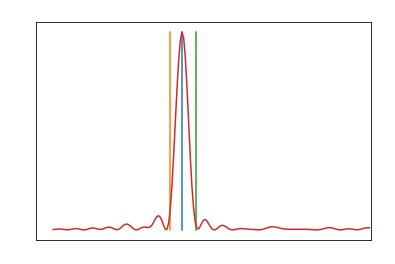

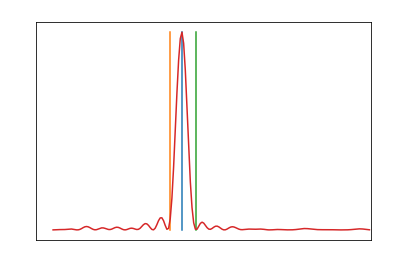

In [129]:
STDs = []
freq = np.arange(0.001, 0.02, 0.0001)
for i in range(10):
    xpoints = np.linspace(0, 115*(i+1), 690*(i+1))
    SNR = 233
    estimates2 = []
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, (690*(i+1)))
    power = LombScargle(xpoints,ypoints).power(freq)
    plt.plot([1/115,1/115],[0,max(power)])
    plt.plot([1/125,1/125],[0,max(power)])
    plt.plot([1/105,1/105],[0,max(power)])
    plt.title(str(i+1), c='white')
    plt.plot(freq, power)
    plt.xlim(0, 0.02)
    plt.show()

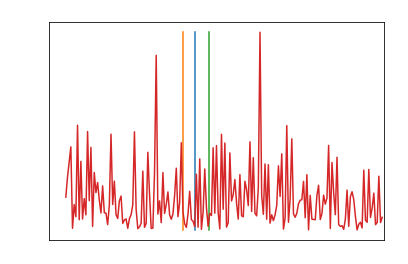

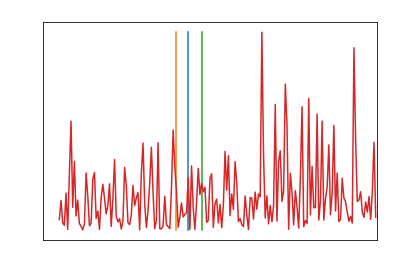

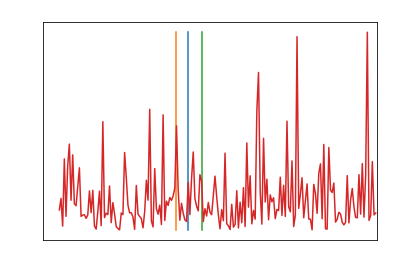

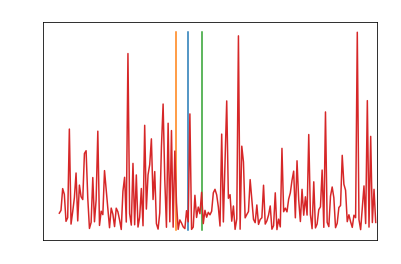

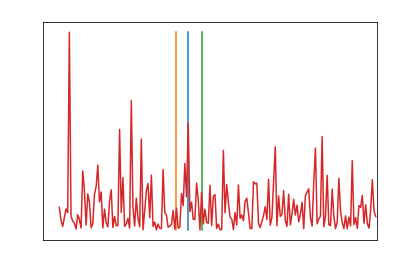

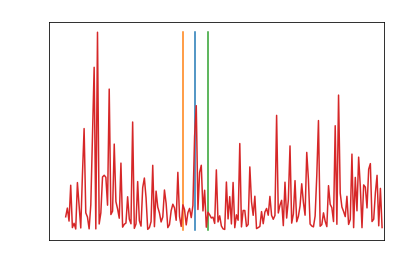

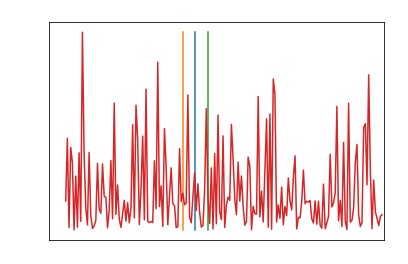

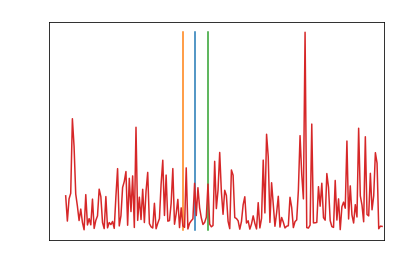

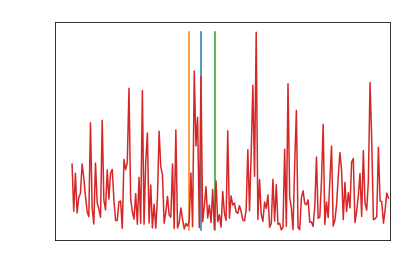

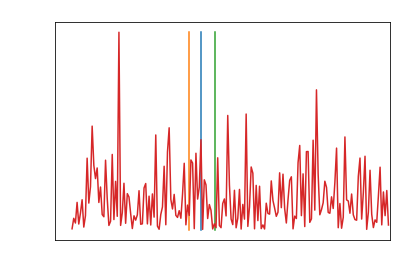

In [130]:
STDs = []
xpointsToPick = np.linspace(0, 259200, 100000)
freq = np.arange(0.001, 0.02, 0.0001)
for i in range(10):
    xpoints = np.random.choice(xpointsToPick, 690*(i+1), replace=False)
    SNR = 233
    estimates2 = []
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, (690*(i+1)))
    power = LombScargle(xpoints,ypoints).power(freq)
    plt.plot([1/115,1/115],[0,max(power)])
    plt.plot([1/125,1/125],[0,max(power)])
    plt.plot([1/105,1/105],[0,max(power)])
    plt.title(str(i+1), c='white')
    plt.plot(freq, power)
    plt.xlim(0, 0.02)
    plt.show()

1is


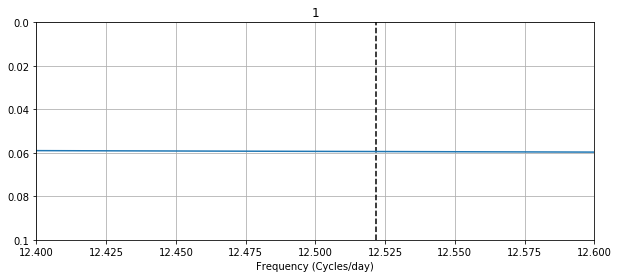

2is


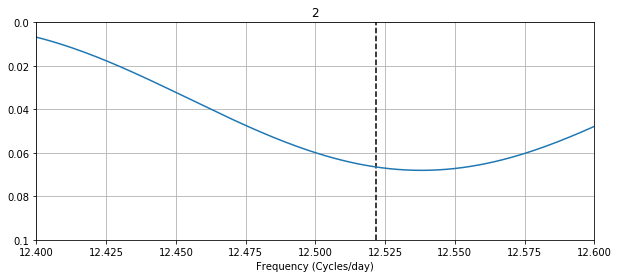

3is


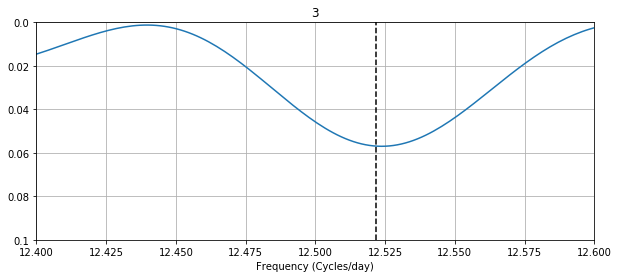

4is


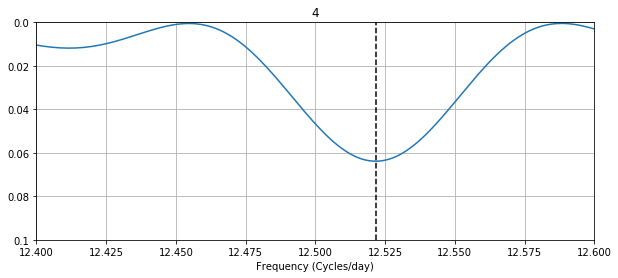

5is


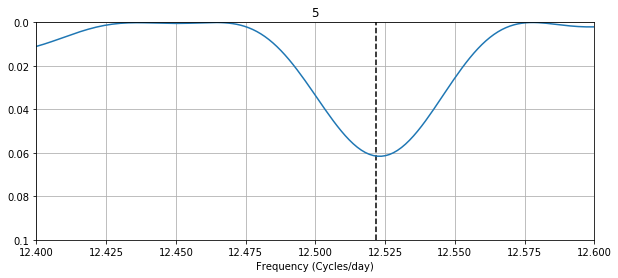

6is


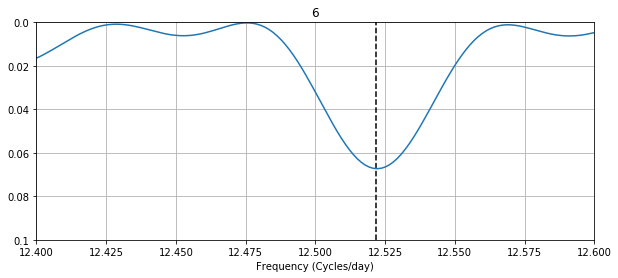

7is


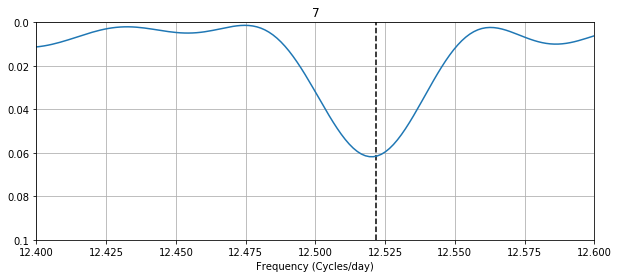

8is


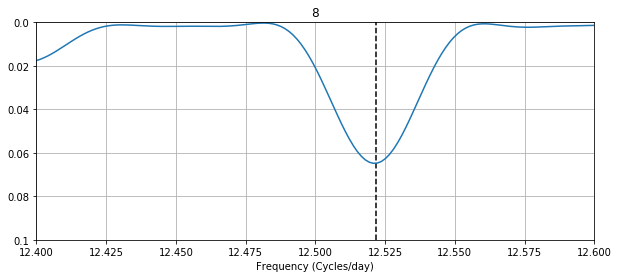

9is
in


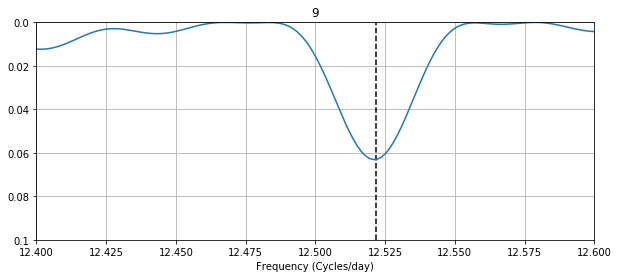

In [139]:
#seems to be the only good one
#180 snr
STDs = []
xpoints = np.linspace(0, 115, 1380)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.ticker import FormatStrFormatter
@ticker.FuncFormatter

def major_formatter(x, pos):
    label = str(-x) if x < 0 else str(x)
    label = round(float(label), 2)
    #label = str(float("{:.2f}".format(label)))
    return label



freq = np.arange(0.0076, 0.00973, 0.000001)
for i in range(1,10):
    print(str(i) + 'is')
    xpoints = np.linspace(0, 115, 690)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,4435,1380))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,11635,1380))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,15955,1380))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,23155,1380))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,24595,1380))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,27475,1380))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,36115,1380))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,40115,1380))
        print('in')
    SNR = 180
    estimates2 = []
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
    power = LombScargle(xpoints,ypoints).power(freq)
    fig, ax = plt.subplots(figsize=(10,4))
    
    
    ax.yaxis.set_major_formatter(major_formatter)
    freqx = freq * 24 *60
    kno = (1/115)*24*60
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.plot([kno,kno],[-0.1,0], 'k--')
    ax.plot(freqx, -power)
    #plt.plot([1/125,1/125],[0,max(power)])
    #plt.plot([1/105,1/105],[0,max(power)])
    plt.title(str(i))
    plt.xlabel('Frequency (Cycles/day)')
    plt.ylim(-0.1, 0)
    plt.xlim(12.4, 12.6)
    plt.grid()
    #115.2 - 114.8
    #12.5-12.54
    plt.show()

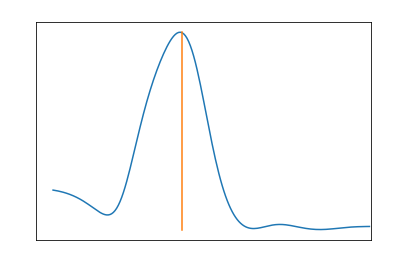

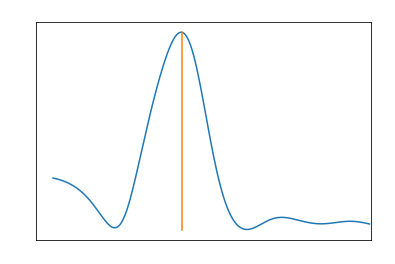

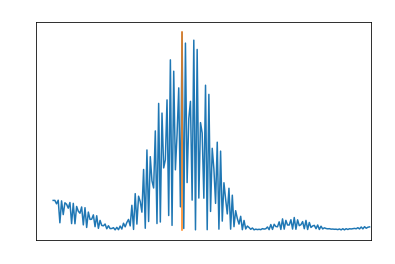

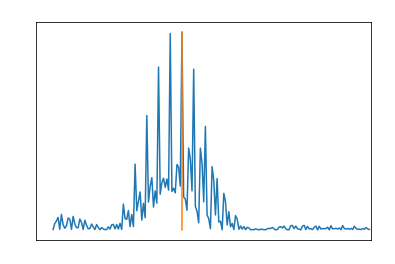

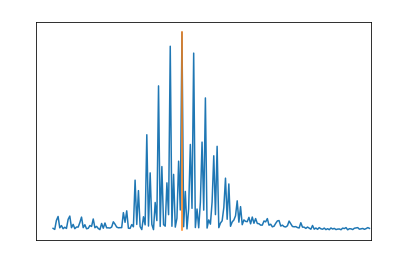

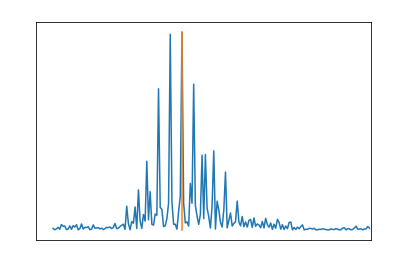

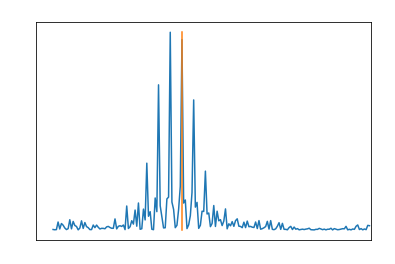

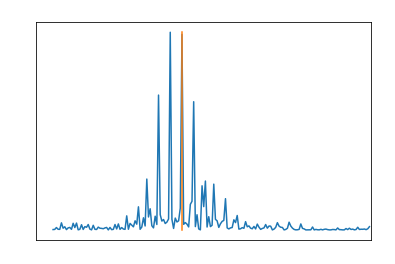

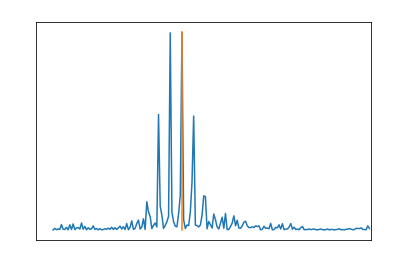

in


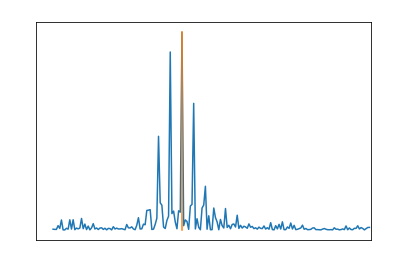

In [136]:
STDs = []
xpoints = np.linspace(0, 115, 690)
xpoints2
freq = np.arange(0.001, 0.02, 0.0001)
for i in range(10):
    xpoints = np.linspace(0, 230, 1380)
    if i > 1:
        xpoints = np.append(xpoints, np.linspace(4320,(4320+230),1380))
    if i > 2:
        xpoints = np.append(xpoints, np.linspace(11520,(11635+115),1380))
    if i > 3:
        xpoints = np.append(xpoints, np.linspace(15840,(15840+115),1380))
    if i > 4:
        xpoints = np.append(xpoints, np.linspace(23040,(23155+115),1380))
    if i > 5:
        xpoints = np.append(xpoints, np.linspace(24480,(24595+115),1380))    
    if i > 6:
        xpoints = np.append(xpoints, np.linspace(27360,(27475+115),1380))
    if i > 7:
        xpoints = np.append(xpoints, np.linspace(36000,(36115+115),1380))
    if i > 8:
        xpoints = np.append(xpoints, np.linspace(40000,(40115+115),1380))
        print('in')
    SNR = 233
    estimates2 = []
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
    power = LombScargle(xpoints,ypoints).power(freq)
    plt.plot(freq, power)
    plt.plot([1/115,1/115],[0,max(power)])
    #plt.plot([1/125,1/125],[0,max(power)])
    #plt.plot([1/105,1/105],[0,max(power)])
    plt.title(str((i+1)*2), c='white')

    plt.xlim(0, 0.02)
    plt.show()

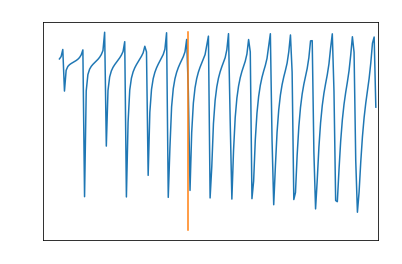

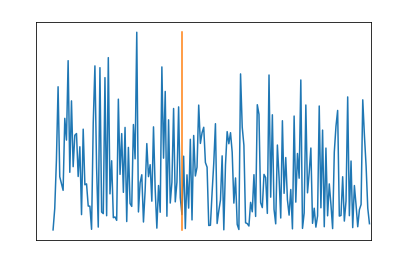

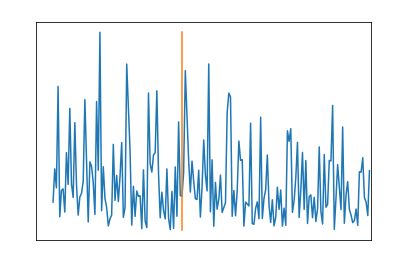

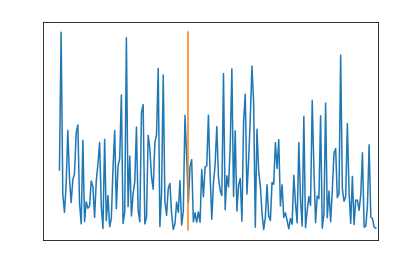

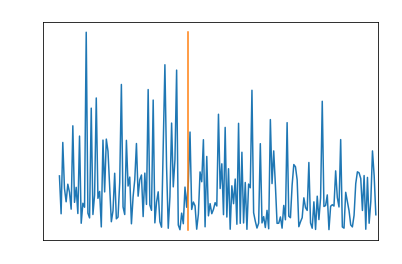

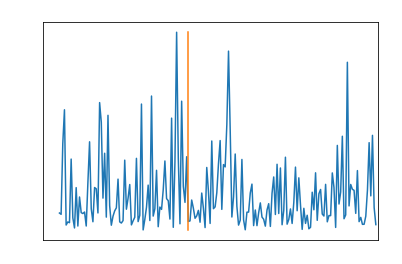

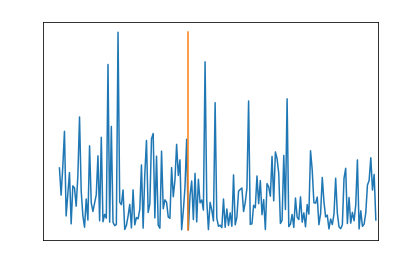

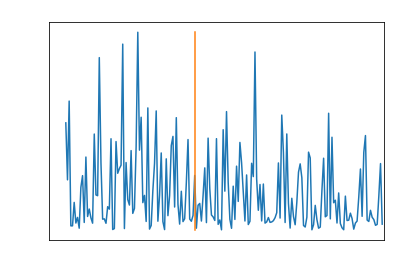

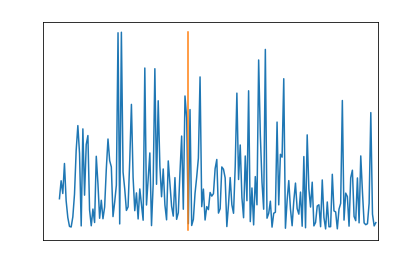

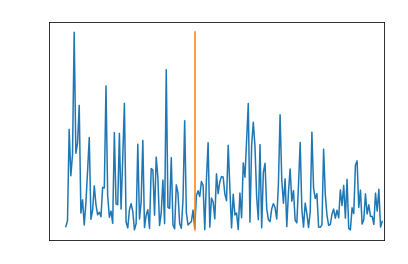

In [140]:
STDs = []
SNR = 233
xpointsChoose = np.linspace(23, 259200, 100000)
freq = np.arange(0.001, 0.02, 0.0001)
for i in range(50):
    xpoints = np.linspace(0, 23, 138)
    starter = np.random.choice(xpointsChoose, i+1, replace=False)
    for el in starter:
        xpoints = np.append(xpoints, np.linspace(el, (el+23), 138))
    estimates2 = []
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
    power = LombScargle(xpoints,ypoints).power(freq)
    if i%5 == 0:
        plt.plot(freq, power)
        plt.plot([1/115,1/115],[0,max(power)])
    #plt.plot([1/125,1/125],[0,max(power)])
    #plt.plot([1/105,1/105],[0,max(power)])
        plt.title(str(i+1), c='white')

        plt.xlim(0, 0.02)
        plt.show()

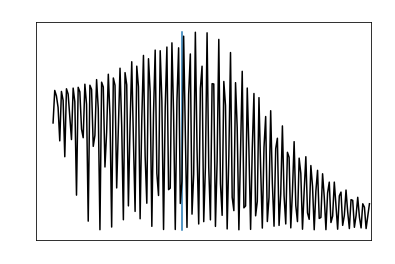

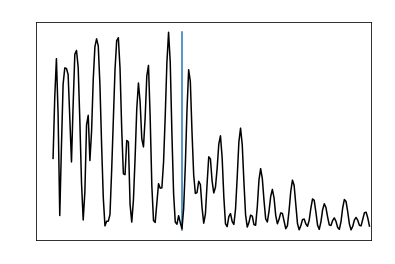

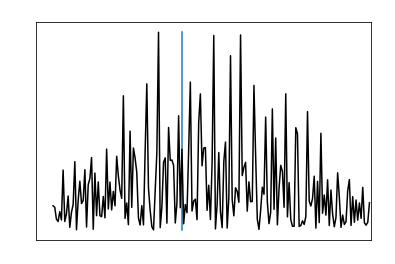

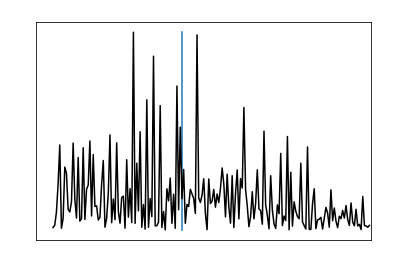

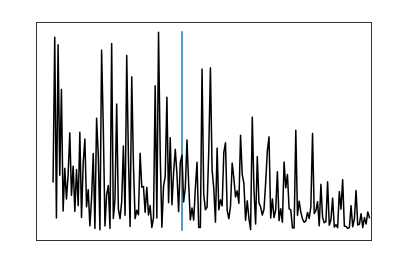

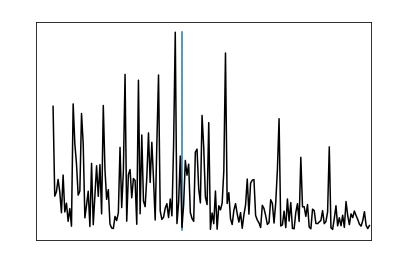

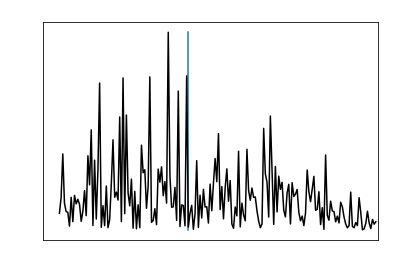

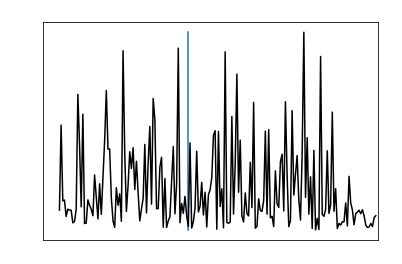

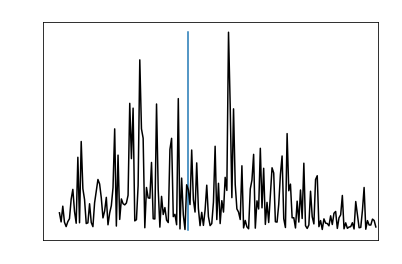

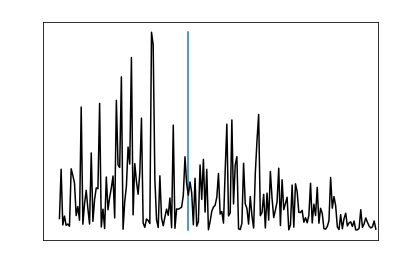

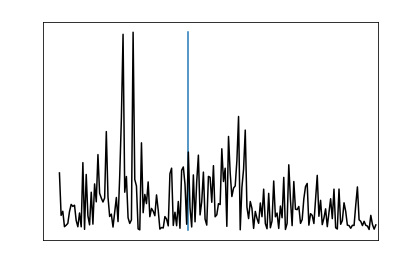

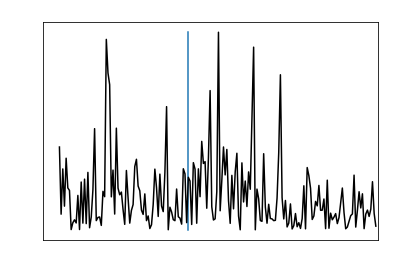

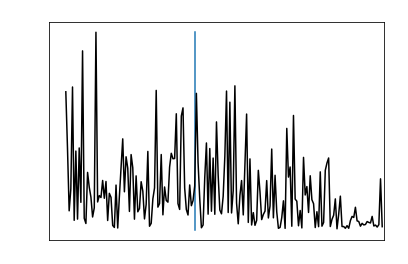

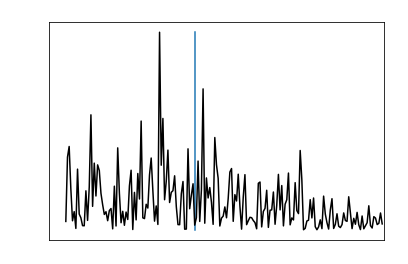

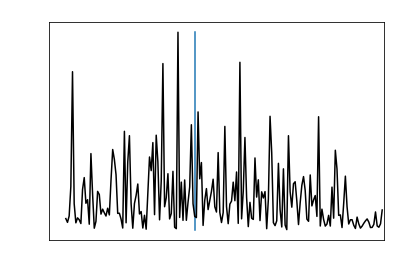

In [143]:
STDs = []
SNR = 233
xpointsChoose = np.linspace(60, 259200, 100000)
freq = np.arange(0.001, 0.02, 0.0001)
for i in range(30):
    xpoints = np.linspace(0, 60, 360)
    starter = np.random.choice(xpointsChoose, i+1, replace=False)
    for el in starter:
        xpoints = np.append(xpoints, np.linspace(el, (el+60), 360))
    estimates2 = []
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, len(xpoints))
    power = LombScargle(xpoints,ypoints).power(freq)
    if i%2 == 0:
        plt.plot([1/115,1/115],[0,max(power)])
        plt.plot(freq, power, c='k')
        
    #plt.plot([1/125,1/125],[0,max(power)])
    #plt.plot([1/105,1/105],[0,max(power)])
        plt.title(str(i+1), c='white')

        plt.xlim(0, 0.02)
        plt.show()

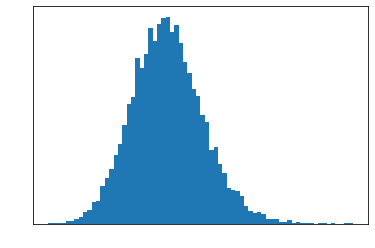

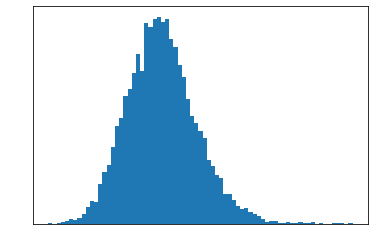

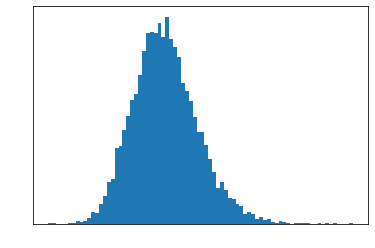

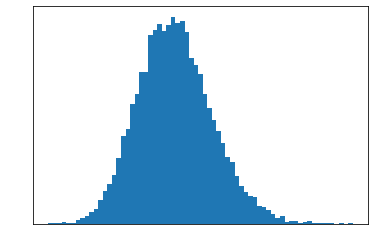

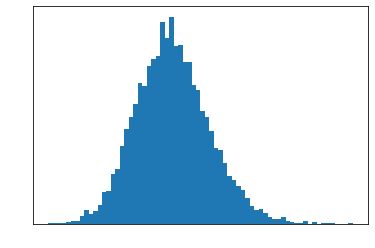

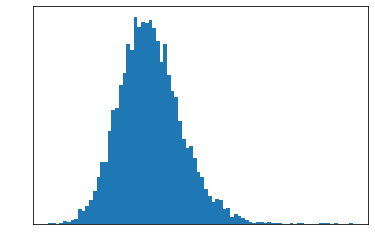

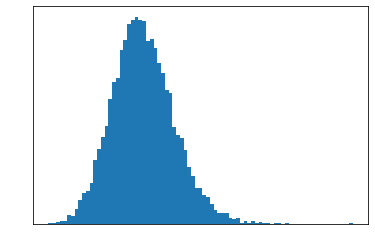

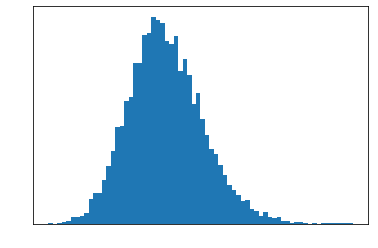

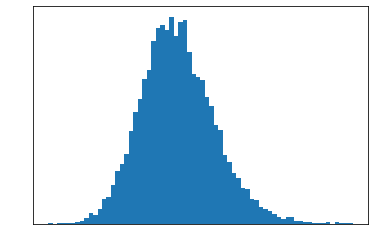

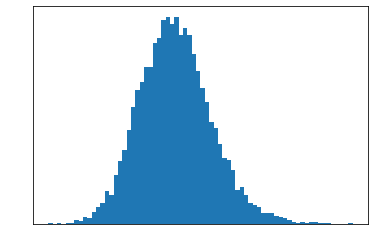

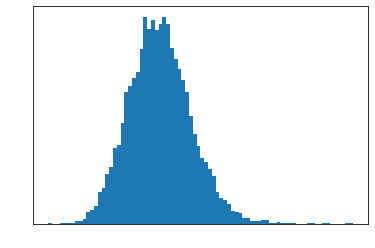

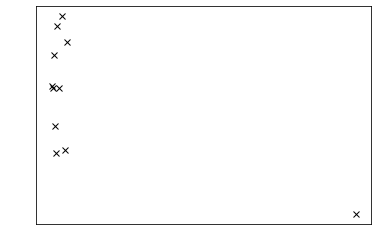

In [95]:
STDs = []
for i in range(len(snrA)):
    npoints = int(points[i])
    SNR = snrA[i]
    xpoints = np.linspace(0,115, npoints)
    estimates2 = []
    def test_func(x, c):
        return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
    for j in range(10000):
        ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, npoints)
        params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
        sigma = np.abs(ypoints - ((SNR*SNR) + (SNR*SNR*0.002)*np.sin(params[0]*xpoints)))
        params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)], sigma=sigma, absolute_sigma=True)
        estimate = 2*np.pi/params[0]
        estimates2 = np.append(estimates2,estimate)
    thisSTD = np.std(estimates2)
    plt.hist(estimates2, bins='auto')
    plt.show()
    STDs = np.append(STDs, thisSTD)
plt.plot(exposure, STDs, 'kx')

(4, 22)

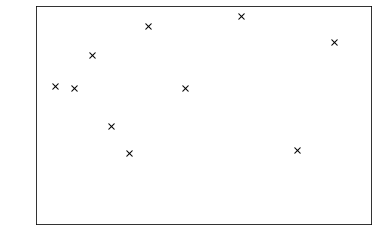

In [96]:
plt.plot(exposure,STDs, 'kx')
plt.xlim(4,22)

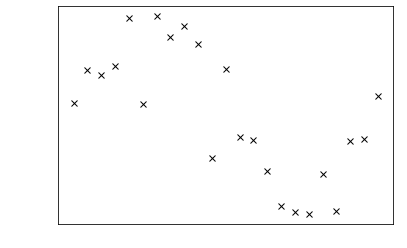

In [98]:
plt.plot(xpoints,ypoints, 'kx')

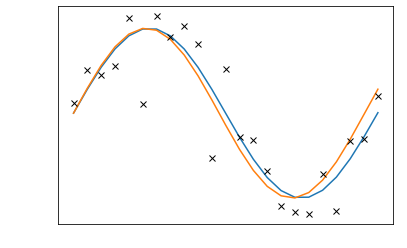

In [102]:


params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
sigma = np.abs(ypoints - ((SNR*SNR) + (SNR*SNR*0.002)*np.sin(params[0]*xpoints)))
params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)], sigma=sigma, absolute_sigma=True)
plt.plot(xpoints, test_func(xpoints,params[0]))
plt.plot(xpoints, test_func(xpoints,((2*np.pi)/110)))
plt.plot(xpoints,ypoints, 'kx')

225

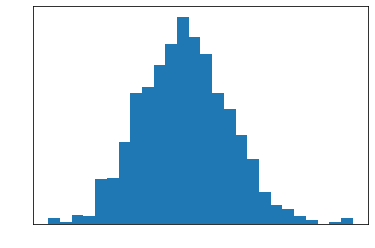

In [125]:
recs = []
SNRin = SNR
for k in range(1000):
    noiseCounts = np.mean(np.abs(np.random.normal(0, SNRin, npoints)))
    recSNR = SNRin*SNRin/noiseCounts
    recs = np.append(recs, recSNR)
plt.hist(recs, bins='auto')
SNR

(array([ 12.,  92., 300., 347., 183.,  54.,  10.,   1.,   0.,   1.]),
 array([103.33751851, 106.88789107, 110.43826364, 113.9886362 ,
        117.53900876, 121.08938133, 124.63975389, 128.19012645,
        131.74049901, 135.29087158, 138.84124414]),
 <a list of 10 Patch objects>)

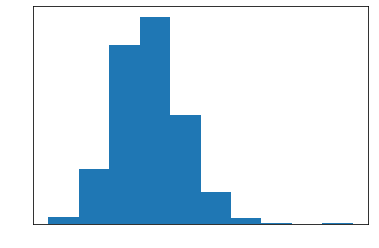

In [124]:
npoints = 690
SNR = 225
xpoints = np.linspace(0,115, npoints)
estimates2 = []
def test_func(x, c):
    return (SNR*SNR) + (SNR*SNR*0.002)*np.sin(c * x)
for i in range(1000):
    ypoints = (SNR*SNR) + (SNR*SNR*0.002)*np.sin((((2*np.pi)/115))*xpoints) + np.random.normal(0, SNR, npoints)
    params, params_covariance = optimize.curve_fit(test_func, xpoints, ypoints,
                                               p0=[((2*np.pi)/115)])
    estimate = 2*np.pi/params[0]
    estimates2 = np.append(estimates2,estimate)
plt.hist(estimates2)